In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [11]:
nx = 10
nt = 10
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [12]:
eq_name = 'diff1d_sine'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

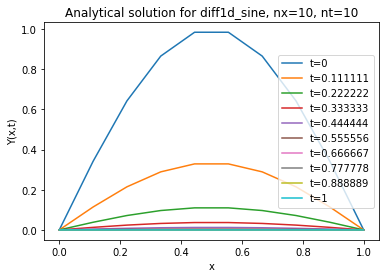

In [13]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s, nx=%d, nt=%d' % (eq_name, nx, nt));

## BFGS (default)

In [14]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

         Current function value: 0.049579
         Iterations: 8000
         Function evaluations: 8644
         Gradient evaluations: 8644
22min 20s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.04957904017386946
 hess_inv: array([[ 2.05190337e+01,  5.31114448e-01,  9.48940584e-02, ...,
         8.12847505e+00,  5.86151480e-01,  1.31926900e+02],
       [ 5.31122650e-01,  2.83038991e+00, -6.12801772e-01, ...,
        -1.20378287e+01, -6.51113290e+00,  2.76483823e+00],
       [ 9.48868028e-02, -6.12802309e-01,  3.33398876e+00, ...,
        -2.49451262e+01, -2.18027508e+00, -4.10266309e+00],
       ...,
       [ 8.12895528e+00, -1.20378274e+01, -2.49451869e+01, ...,
         8.36091981e+03,  1.04326014e+02,  2.16523110e+03],
       [ 5.86138297e-01, -6.51112813e+00, -2.18028485e+00, ...,
         1.04326107e+02,  3.85295890e+01,  1.09868778e+01],
       [ 1.31926806e+02,  2.76483123e+00, -4.10259211e+00, ...,
         2.16523793e+03,  1.09867584e+01,  5.82946583e+

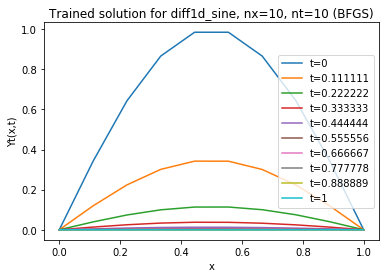

In [15]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));

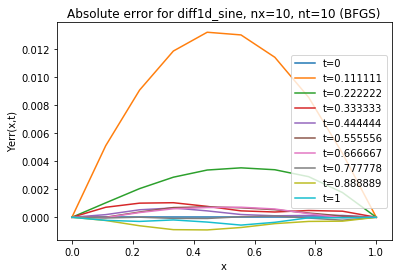

In [16]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));

## BFGS (maxit=16000)

In [18]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['maxiter'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

         Current function value: 0.032164
         Iterations: 13178
         Function evaluations: 14226
         Gradient evaluations: 14217
34min 53s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.03216366763197437
 hess_inv: array([[ 2.95084617e+02,  7.86855859e+00,  7.07158759e+00, ...,
         2.16546796e+02, -3.31811867e+01, -1.83469307e+02],
       [ 7.86855471e+00,  3.48780261e+00,  3.90695170e+00, ...,
         3.00028093e+01, -5.80355482e+00, -3.20561775e+01],
       [ 7.07154013e+00,  3.90695350e+00,  1.80088327e+01, ...,
         7.07231744e+01, -1.21869229e+01, -3.30608752e+02],
       ...,
       [ 2.16546896e+02,  3.00028029e+01,  7.07231963e+01, ...,
         6.99772694e+02, -1.14521468e+02, -1.28321817e+03],
       [-3.31811997e+01, -5.80355166e+00, -1.21869390e+01, ...,
        -1.14521401e+02,  5.09177460e+01,  2.15699871e+02],
       [-1.83468928e+02, -3.20562306e+01, -3.30608613e+02, ...,
        -1.28321819e+03,  2.15699729e+02,  1.1426828

In [ ]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s, gtol=%g)' % (eq_name, nx, nt, trainalg, options['gtol']));

In [ ]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8)

In [ ]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

In [ ]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s, gtol=%g)' % (eq_name, nx, nt, trainalg, options['gtol']));

In [ ]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-10)

In [ ]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-10
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

In [ ]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s, gtol=%g)' % (eq_name, nx, nt, trainalg, options['gtol']));

In [ ]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));